# Part 1 - Warm-up #

### Task 1 ###
1. Fit the curve and plot it


In [1]:
import pandas as pd

#load task-1 data in a dataframe

data_df = pd.read_csv('task-1.csv')
data_df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


Coefficients: [ 7.80631838 31.52920122]


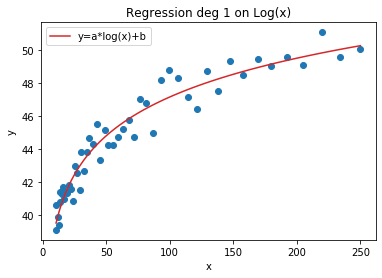

In [2]:
import numpy as np

#define the arrays x and y
x= data_df.x.values
y= data_df.y.values

#fit the data to model
coefs = np.polyfit(np.log10(x), y, deg=1)
print('Coefficients:', coefs) # [ 7.80631838 31.52920122]

# Generate a hundred data points
x_values = np.linspace(x.min(), x.max(), num=100)
# Compute predictions
y_values = np.polyval(coefs, np.log10(x_values))

#plot the data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data_df.x,data_df.y)
plt.plot(x_values, y_values, c='C3', label='y=a*log(x)+b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression deg 1 on Log(x)')
plt.legend()
plt.show()

2. Compute the RSS and R<sup>2</sup> measures

In [3]:
#Compute the Residual Sum of Squares (RSS)

def RSS (y,y_pred):
    return np.sum(np.square(y-y_pred))

y_pred = np.polyval(coefs, np.log10(x))

#RSS model
RSS_model = RSS(y,y_pred)
print('RSS: {:.3f}'.format(RSS(y, y_pred))) # RSS: 31.843


#Compute the R2 measure (Coefficient of determination)

#RSS baseline
RSS_baseline = RSS(y,y.mean())
print('RSS_baseline: {:.3f}'.format(RSS(y,y.mean()))) # 541.143

#R2
R2 = 1-(RSS_model/RSS_baseline) # 0.9411567093138287

print('R2: ',R2)

RSS: 31.843
RSS_baseline: 541.143
R2:  0.9411567093138287


3. Discuss the results, is it a good R<sup>2</sup> score?

> Usually we can interpret **4** different cases while analysing R<sup>2</sup> scores (R<sup>2</sup>= 1, R<sup>2</sup> close to 1, R<sup>2</sup> close to 0 and R<sup>2</sup> < 0). In our case R<sup>2</sup> is close to **1** (0.94), then the model performs
way better than the baseline and one can say that **0.94** is a good
R<sup>2</sup> score.

### Task 2 ###
1. Fit a linear regression with the outliers

In [4]:
import pandas as pd
import numpy as np

# load task-2 data in a dataframe
data_df2 = pd.read_csv('task-2.csv')
data_df2.head()

# Split into train/test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

y = data_df2.y.values
X = data_df2.drop('y', axis=1).values

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2, random_state=0)

# linear regression with the outliers
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_tr,y_tr)
print(lr.coef_) # [ 3.18946219  0.72611244 -0.29586984]

y_pred_lr = lr.predict(X_te)

print('MAE_lr: {:.4f}'.format(MAE(y_te, y_pred_lr)))  # MAE_lr: 104.7884


[ 3.18946219  0.72611244 -0.29586984]
MAE_lr: 104.7884


2. Fit a huber regression with the outliers

In [5]:
# Huber regression with the outliers
from sklearn.linear_model import HuberRegressor

lr_huber= HuberRegressor()

lr_huber.fit(X_tr, y_tr)
print(lr_huber.coef_) # [11.70103561  2.21157024 -0.3504923 ]

y_pred_lr_huber = lr_huber.predict(X_te)

print('MAE_lr_huber {:.4f}'.format(MAE(y_te, y_pred_lr_huber))) # MAE_lr_huber 83.9081

[11.70103561  2.21157024 -0.3504923 ]
MAE_lr_huber 83.9081


3. Fit a linear regression without the outliers

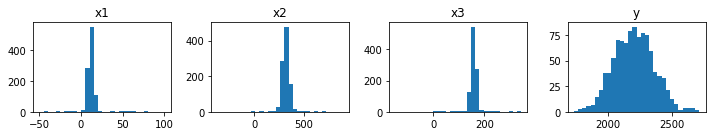

(1000, 4)

In [6]:
import pandas as pd
import numpy as np

#plotting the data
%matplotlib inline
import matplotlib.pyplot as plt

columns = ['x1','x2','x3','y']

fig,axes = plt.subplots(nrows=1, ncols=4, figsize =(10,2))

for c, ax in zip (columns,axes.ravel()):
    ax.hist(data_df2[c], bins=30)
    ax.set_title(c)

plt.tight_layout() # to avoid overlapping with the labels
plt.show()

#work on a copy
df = data_df2.copy()

#compute z-scores, and eliminate outliers

for c in columns:
    df[c] = (df[c]-df[c].mean())/df[c].std()
    idx = (np.abs(df[c])>2)
    df[c]= df[c][~idx]
    name = '{}'.format(c)
    df[name] = df[c]

#dataframe without outliers (keep data within 2 standard deviations)
df_wo = pd.concat([df['x1'], df['x2'], df['x3'], df['y']], axis=1)

# Fill missing values
for c in df_wo.columns:
    df_wo[c] = df_wo[c].fillna(df_wo[c].median())

df_wo.shape

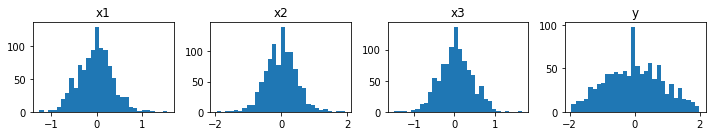

In [7]:
#visualize data again without outliners

columns = ['x1','x2','x3','y']

fig,axes = plt.subplots(nrows=1, ncols=4, figsize =(10,2))

for c, ax in zip (columns,axes.ravel()):
    ax.hist(df_wo[c], bins=30)
    ax.set_title(c)

plt.tight_layout() # to avoid overlapping with the labels
plt.show()

In [8]:
# Split into train/test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

y = df_wo.y.values
X = df_wo.drop('y', axis=1).values

X_tr_wo, X_te_wo, y_tr_wo, y_te_wo = train_test_split(X,y,test_size=0.2, random_state=0)

# linear regression with the outliers
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_tr_wo,y_tr_wo)
print(lr.coef_) # [0.99318644 1.02223205 0.35157281]

y_pred_lr_wo = lr.predict(X_te_wo)

print('MAE_lr_wo: {:.4f}'.format(MAE(y_te_wo, y_pred_lr_wo))) # MAE_lr_wo: 0.4034

[0.99318644 1.02223205 0.35157281]
MAE_lr_wo: 0.4034


### Discuss the results ###
> As per the results below, we can see that the linear regression **without outliners** and the **huber regression** are performing better than the regression **with outliers** as per lower respective MAE.

MAE_baseline: 117.26
MAE_lr: 104.7884
MAE_lr_huber 83.9081
MAE_lr_wo: 0.4034


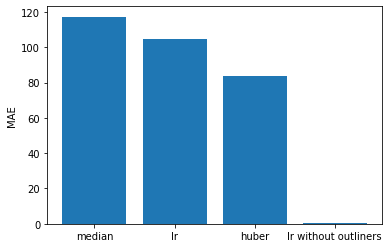

In [9]:
#calulate the baseline (mean)

def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

MAE_baseline = MAE(y_te, np.mean(y_tr))

#compare the different models
print('MAE_baseline: {:.2f}'.format(MAE_baseline)) # 117.26
print('MAE_lr: {:.4f}'.format(MAE(y_te, y_pred_lr)))  # MAE_lr: 104.7884
print('MAE_lr_huber {:.4f}'.format(MAE(y_te, y_pred_lr_huber))) # MAE_lr_huber 83.9081
print('MAE_lr_wo: {:.4f}'.format(MAE(y_te_wo, y_pred_lr_wo))) # MAE_lr_wo: 0.4034

#plot the different models

# Final comparison
mae_values = [MAE_baseline, MAE(y_te, y_pred_lr), MAE(y_te, y_pred_lr_huber), MAE(y_te_wo, y_pred_lr_wo)]
titles = ['median', 'lr', 'huber', 'lr without outliners']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()